In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [136]:
df = pd.read_csv('ecommerce_orders_revenue.csv')

In [137]:
df.head()

,order_id,customer_id,product_category,order_value,discount_applied,payment_method,order_status,order_date,region
0,34d8ba8f-0afd-44cf-823f-b2354135703c,be0365c6-8790-4246-9302-634ffab9df26,Groceries,111.06,NaN,Bank Transfer,refunded,2024-03-12,Michigan
1,8627135c-c464-4c18-b732-2edf41eddd55,8f584420-5885-4335-95e0-6ab271f3161b,Fashion,385.79,5.0,Bank Transfer,completed,2024-09-01,Massachusetts
2,79924210-fff2-4914-9a89-a2a7d6f19916,34733dcd-976b-4d23-a524-ba62719e8b78,Electronics,55.24,5.0,Wallet,cancelled,2024-11-18,Massachusetts
3,82081915-4d79-4c93-8a10-16dca7aad660,b3de034f-1075-4f41-ad4a-effc4ef5df53,Electronics,352.88,15.0,Bank Transfer,refunded,2024-10-27,New Hampshire
4,f19bcde8-c96f-4e5e-a677-40795b86fbe3,04e94727-26fd-424d-9cbe-54dd84367952,Fashion,48.27,10.0,Wallet,completed,2024-10-28,Montana


In [138]:
df.tail()

,order_id,customer_id,product_category,order_value,discount_applied,payment_method,order_status,order_date,region
2995,071e2a9f-16ec-46f6-939d-1ffbca2b444b,01ff829b-d66a-44e7-8b2a-e5f53adc5b93,Electronics,438.88,10.0,Card,refunded,2024-03-07,Montana
2996,8a9f456f-9277-4d88-9f5f-b383e7b2d3d2,901fcf0c-3c60-4cf4-9e5e-224cf782b7d5,Beauty,351.24,5.0,Card,completed,2024-12-12,Wyoming
2997,c3bf0256-fa23-4e60-9ef0-d6bcb60f963a,480f7f37-5cb9-4888-ab57-7c9ca069cf03,Home,406.33,15.0,Wallet,cancelled,2024-01-17,California
2998,0082d868-ffa9-4e0a-b073-f778bb27658d,c1d9e7d4-3889-4f3d-962e-b76194168c4c,Fashion,377.98,10.0,Bank Transfer,completed,2024-02-12,Maine
2999,d656d131-1996-4378-9798-4a9c43a54482,609a958f-15b3-497e-ad3e-301c9cfac36a,Groceries,208.28,0.0,Wallet,cancelled,2024-01-27,Indiana


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          3000 non-null   object 
 1   customer_id       3000 non-null   object 
 2   product_category  3000 non-null   object 
 3   order_value       3000 non-null   float64
 4   discount_applied  2390 non-null   float64
 5   payment_method    3000 non-null   object 
 6   order_status      3000 non-null   object 
 7   order_date        3000 non-null   object 
 8   region            3000 non-null   object 
dtypes: float64(2), object(7)
memory usage: 211.1+ KB


In [140]:
df["order_date"] = pd.to_datetime(df["order_date"])

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          3000 non-null   object        
 1   customer_id       3000 non-null   object        
 2   product_category  3000 non-null   object        
 3   order_value       3000 non-null   float64       
 4   discount_applied  2390 non-null   float64       
 5   payment_method    3000 non-null   object        
 6   order_status      3000 non-null   object        
 7   order_date        3000 non-null   datetime64[ns]
 8   region            3000 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 211.1+ KB


In [142]:
df["discount_applied"].unique()

array([nan,  5., 15., 10.,  0.])

In [143]:
df.isnull().sum()

order_id              0
customer_id           0
product_category      0
order_value           0
discount_applied    610
payment_method        0
order_status          0
order_date            0
region                0
dtype: int64

In [144]:
df[df["discount_applied"].isnull()]["order_value"].head()

0     111.06
9     338.88
10     37.05
11    423.02
13    442.52
Name: order_value, dtype: float64

In [145]:
df[df["discount_applied"].notna()]["order_value"].head()

1    385.79
2     55.24
3    352.88
4     48.27
5    317.80
Name: order_value, dtype: float64

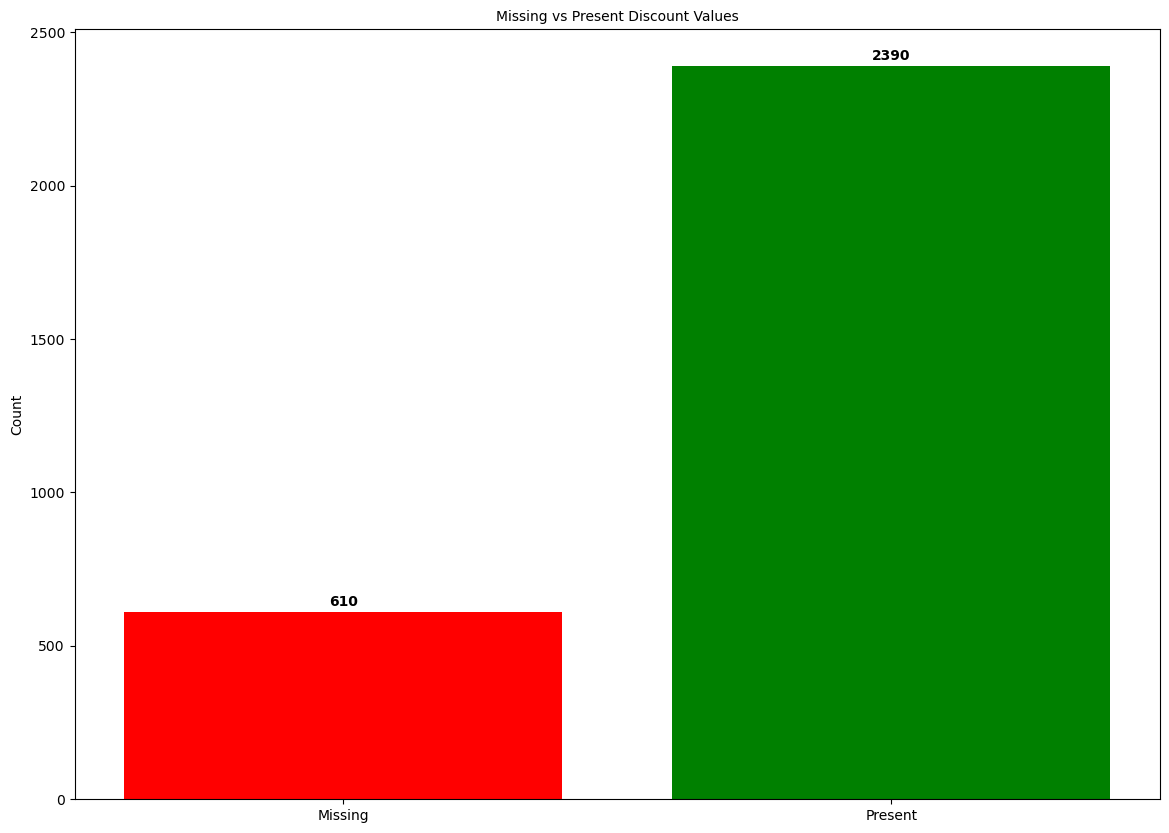

In [146]:
# Visualization of missing patterns

fig, axes = plt.subplots(1, 1, figsize=(14, 10))

missing_data = [df["discount_applied"].isnull().sum(), df["discount_applied"].notna().sum()]
axes.bar(["Missing", "Present"], missing_data, color={"red", "green"})
axes.set_title("Missing vs Present Discount Values", fontsize=10)
axes.set_ylabel("Count")
for i, v in enumerate(missing_data):
    axes.text(i, v + 20, str(v), ha="center", fontweight="bold")
plt.show()

In [147]:
# Impute with 0 (No discount)
df["discount_applied"] = df["discount_applied"].fillna(0)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          3000 non-null   object        
 1   customer_id       3000 non-null   object        
 2   product_category  3000 non-null   object        
 3   order_value       3000 non-null   float64       
 4   discount_applied  3000 non-null   float64       
 5   payment_method    3000 non-null   object        
 6   order_status      3000 non-null   object        
 7   order_date        3000 non-null   datetime64[ns]
 8   region            3000 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 211.1+ KB


### Exploratory Data Analysis (EDA) of revenue trends


Revenue Trends EDA involves analyzing how revenue patterns change over time, identifying peak sales periods, and understanding factors influencing revenue fluctuations. 

1. Temporal Analysis: Examine revenue data over different time frames (daily, weekly, monthly, quarterly, yearly) to identify trends and seasonal patterns.

In [149]:
date_range = df['order_date'].min(), df['order_date'].max()

In [150]:
print(f"The data range from  {date_range[0]} to {date_range[1]}")

The data range from  2024-01-01 00:00:00 to 2024-12-31 00:00:00


In [151]:
print(f"The total revenue for that period is ${df["order_value"].sum():,.2f}")

The total revenue for that period is $758,592.08


## Basic Revenue Statistics

Understanding the baseline - the range, average and spread of the revenue. This reveals;

- if revenue is normally distributed or skewed
- Presence of outliers or unusual transactions
- central tendency (mean vs median gives information about skewness)

In [152]:
df["order_value"].describe()

count    3000.000000
mean      252.864027
std       142.529264
min        10.420000
25%       130.372500
50%       251.480000
75%       378.365000
max       500.000000
Name: order_value, dtype: float64

In [153]:
revenue_stats = {
    "total Revenue": f"${df["order_value"].sum():,.2f}",
    "mean revenue": f"${df["order_value"].mean():.2f}",
    "median revenue": f"${df["order_value"].median():.2f}",
    "standard deviation": f"${df["order_value"].describe()["std"]:.2f}",
    "min revenue value": f"${df["order_value"].describe()["min"]:.2f}",
    "max revenue value": f"${df["order_value"].describe()["max"]:.2f}",
    "Q1 (25%)": f"${df["order_value"].describe()["25%"]:.2f}",
    "Q2 (75%)": f"${df["order_value"].describe()["75%"]:.2f}",
    "IQR": f"${df["order_value"].quantile(0.75) - df["order_value"].quantile(0.25):.2f}"
}

for metric, value in revenue_stats.items():
    print(f"{metric:.<35} {value:>20}")

total Revenue......................          $758,592.08
mean revenue.......................              $252.86
median revenue.....................              $251.48
standard deviation.................              $142.53
min revenue value..................               $10.42
max revenue value..................              $500.00
Q1 (25%)...........................              $130.37
Q2 (75%)...........................              $378.37
IQR................................              $247.99


Since the mean is greater than the median, the Revenue is right-skewed (high outliers pull mean up)

In [154]:
mean_val = df["order_value"].mean()
std_val = df["order_value"].std()

cov = (std_val / mean_val) * 100
print(f"The coefficient of variation is {cov:.1f}%, which shows how much the review vary in relation to the mean")

The coefficient of variation is 56.4%, which shows how much the review vary in relation to the mean


Since the coefficient of variation is very high, greater than 50%, The revenue is highly unpredictable

In [155]:
tolerance = cov * mean_val
upper_bound = mean_val + tolerance
lower_bound = mean_val - tolerance

In [156]:
print("This means...")
print(f"For the best case day the income will be ${upper_bound:,.2f} ({cov:.1f}% profit)")
print(f"For the average day normal working day, the income will be ${mean_val:.2f}")
print(f"For the worst day there will be a loss of ${lower_bound:,.2f} ({cov:.1f}% loss)")


This means...
For the best case day the income will be $14,505.79 (56.4% profit)
For the average day normal working day, the income will be $252.86
For the worst day there will be a loss of $-14,000.06 (56.4% loss)


## Revenue distribution analysis

To see the shape of the revenue data:
- Are most orders small
- Identify outliers that might be data errors or probably VIP customers
- Understand pricing tiers (are there natural groupings)?

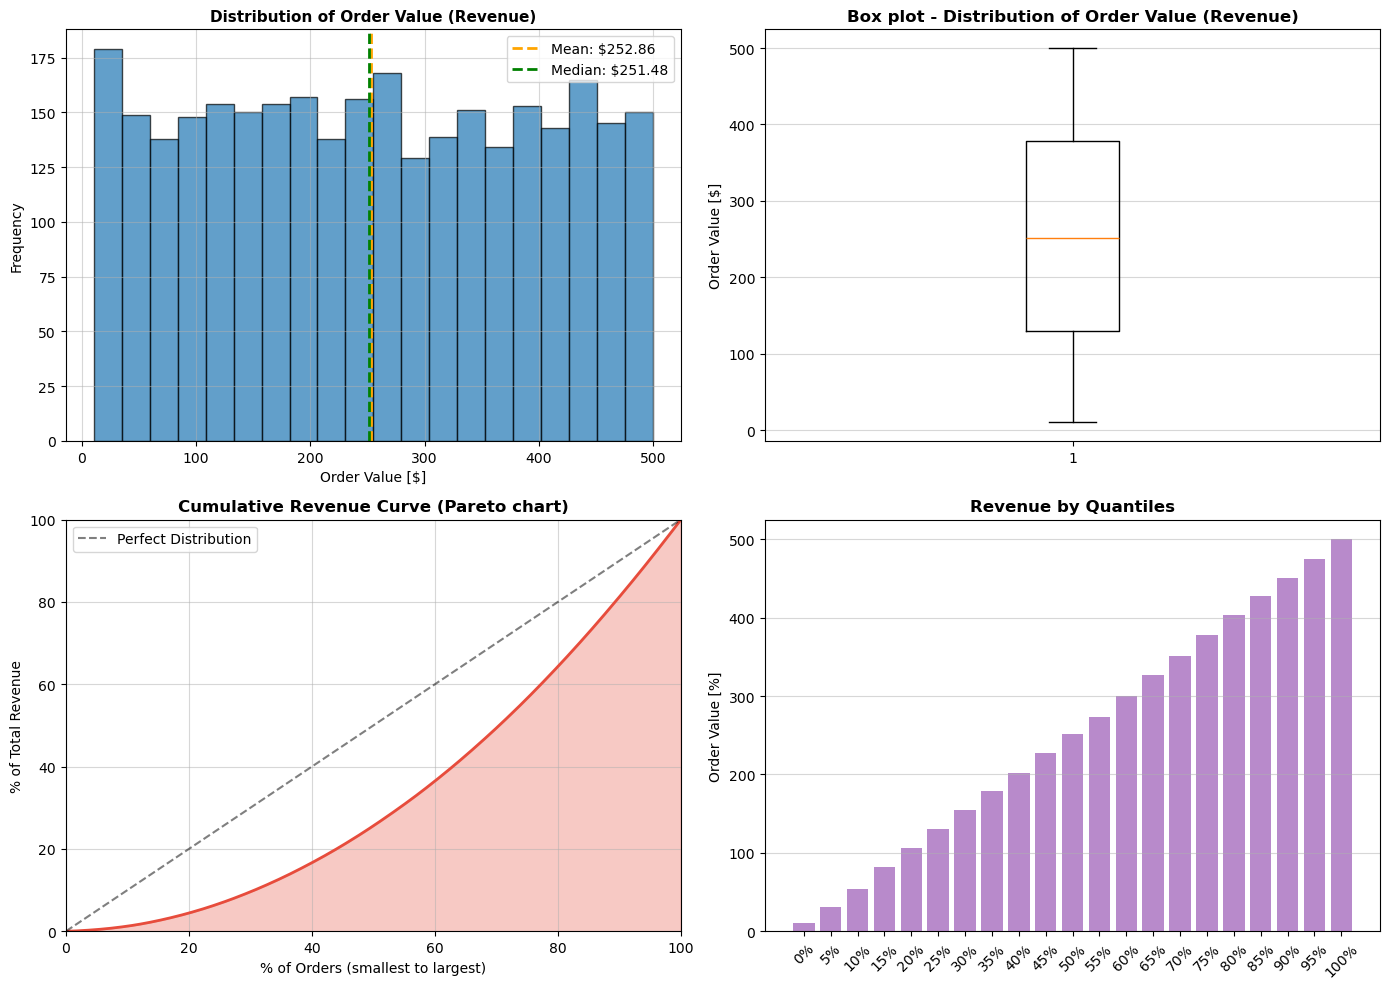

In [157]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histrogram with KDE

axes[0, 0].hist(df["order_value"], bins=20, edgecolor="black", alpha=0.7)
axes[0, 0].axvline(df["order_value"].mean(), color="orange", linestyle="--", linewidth=2, label=f"Mean: ${df["order_value"].mean():.2f}")
axes[0, 0].axvline(df["order_value"].median(), color="green", linestyle="--", linewidth=2, label=f"Median: ${df["order_value"].median():.2f}")
axes[0, 0].set_title("Distribution of Order Value (Revenue)", fontsize=11, fontweight="bold")
axes[0, 0].set_xlabel("Order Value [$]")
axes[0, 0].set_ylabel("Frequency")
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.5)


# Box plot (to detect outliers)
axes[0, 1].boxplot(df["order_value"], vert=True)
axes[0, 1].set_title("Box plot - Distribution of Order Value (Revenue)", fontsize=12, fontweight="bold")
axes[0, 1].set_ylabel("Order Value [$]")
axes[0, 1].grid(alpha=0.5, axis='y')

# Cumulative revenue curve (showing which orders drive revenue)
sorted_values = np.sort(df["order_value"])
cumsum = np.cumsum(sorted_values)
cumsum_pct = (cumsum / cumsum[-1]) * 100
order_pct = np.arange(1, len(cumsum) + 1) / len(cumsum) * 100

axes[1, 0].plot(order_pct, cumsum_pct, linewidth=2, color="#e74c3c")
axes[1, 0].fill_between(order_pct, cumsum_pct, alpha=0.3, color="#e74c3c")
axes[1, 0].plot([0, 100], [0, 100], "k--", alpha=0.5, label="Perfect Distribution")
axes[1, 0].set_title("Cumulative Revenue Curve (Pareto chart)", fontsize=12, fontweight="bold")
axes[1, 0].set_xlabel('% of Orders (smallest to largest)')
axes[1, 0].set_ylabel('% of Total Revenue')
axes[1, 0].set_xlim(0, 100)
axes[1, 0].set_ylim(0, 100)
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.5)

# Quantile Distribution
quantiles = np.arange(0, 1.05, 0.05)
quantiles_values = np.quantile(df["order_value"], quantiles)
axes[1, 1].bar([f"{int(q*100)}%" for q in quantiles], quantiles_values, color="#9b59b6",alpha=0.7)
axes[1, 1].set_title("Revenue by Quantiles", fontsize=12, fontweight="bold")
axes[1, 1].set_ylabel("Order Value [%]")
axes[1, 1].grid(alpha=0.5, axis="y")
axes[1, 1].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

### Insights from the above charts
- Histogram:
  - The data is a little bit right-skewed the mean($252.66) > median($251.48). Most orders cluster around $250
  - Few high value orders outliers exist
  - Business implication: Pricing is relatively consistent;
- Box plot:
  - There is no visible dots below or above the whiskers which means there are either very little or no outliers at all; so most order values are predictable
  - Tight IQR: Middle 50% of the orders fall within the range of $130.38 and $378.36, with IQR of $247.99 which also means that most of the orders are clustered around $250.
  - Symmetry: Box appears to be roughly centered on median line
  - Business implication: Revenue is fairly stable and predictable; no extreme VIP or low-value customer clusters.
- Pareto Chart - Cumulative Revenue Curve:
  - The curve started steep then finally flattens; a classical Pareto pattern
  - 

In [158]:
df["order_value"].describe()

count    3000.000000
mean      252.864027
std       142.529264
min        10.420000
25%       130.372500
50%       251.480000
75%       378.365000
max       500.000000
Name: order_value, dtype: float64

In [159]:
df["discount_applied"].unique()

array([ 0.,  5., 15., 10.])

## Relationships
Understanding what factors influence revenue:
- Which factors matter for high-value orders?
- Deos discount increase or reduce total revenue?
- Are certain categories more profitable after accounting for costs?

In [160]:
# Discount impact on revenue
no_discount_revenue = df[df["discount_applied"] == 0]["order_value"].sum()
with_discount_revenue = df[df["discount_applied"] > 0]["order_value"].sum()
no_discount_avg = df[df["discount_applied"] == 0]["order_value"].mean()
with_discount_avg = df[df["discount_applied"] > 0]["order_value"].mean()

# No discount orders:
print("No discount orders:")
print(f"No discount revenue ${no_discount_revenue:,.2f} with an average order value of ${no_discount_avg:.2f}")
print(f"With percentage of the total order as: {no_discount_revenue/(no_discount_revenue + with_discount_revenue)*100:.1f}%")

print("Discounted orders:")
print(f"Discounted revenue ${with_discount_revenue:,.2f} with an average order value of ${with_discount_avg:.2f}")
print(f"With percentage of the total order as: {with_discount_revenue/(no_discount_revenue + with_discount_revenue)*100:.1f}%")

percentage_diff = ((no_discount_avg - with_discount_avg) / no_discount_avg) * 100
print(f"The average order value for discounted orders is {percentage_diff:.1f}% lower than the average order value for non-discounted orders.")


No discount orders:
No discount revenue $301,570.54 with an average order value of $253.63
With percentage of the total order as: 39.8%
Discounted orders:
Discounted revenue $457,021.54 with an average order value of $252.36
With percentage of the total order as: 60.2%
The average order value for discounted orders is 0.5% lower than the average order value for non-discounted orders.


From the analysis above it can be observed that while discounted orders contribute a significant portion of the total revenue, they have a lower average order value compared to non-discounted orders. This suggests that while discounts may drive more sales, they may also reduce the average revenue per order.

## Customer Segmentatation (RFM analysis)

RFM (Recency. Frequency, Monetary) is a customer segmentation technique that identifies and groups customers based on three key behaviors:

Recency(R): How recently did the customer make a purchase? (days since last order)
- Recent buyers are more likely to respond to campaigns
- Inactive customers need win-back campaigns
Frequency(F): How often does ahe customer purchase? (Number of orders)
- Frequent buyers are loyal and engaged
- One time buyers may not return
 
Monetary(M): How much has the customer spent? (total revenue per customer)
- High spenders are the VIP customers
- Low spenders have low lifetime value

### Why RFM matters for e-commerce:

1. Identify VIP customers: Focus retention efforts customers that spend more
2. Detect at-risk customers: win-back compaigns for inactive high-spenders
3. Prioritize marketing budget: dont spend on lost customers
4. Personalize experiences: Different messages for different segments
5. Revenue optimization: Convert potentials to loyal customers

In [161]:
# Calculating metrics for each customer

reference_date = df["order_date"].max() + pd.Timedelta(days=1)

rfm = df.groupby("customer_id").agg({
    "order_date": lambda x: (reference_date - x.max()).days, # Recency (days since last purchase)
    "order_id": "count", # Frequency (number of orders)
    "order_value": "sum" # Monetary (total spending)
}).rename(columns={
    "order_date": "Recency",
    "order_id": "Frequency",
    "order_value": "Monetary"
})

rfm = rfm.reset_index()
rfm.head()

,customer_id,Recency,Frequency,Monetary
0,0000766d-3cd0-4997-89b8-c5cc617c36cf,354,1,499.67
1,0016b6b8-8c3f-4251-a73c-9daf386cfb58,50,1,448.08
2,002467a4-fe8c-4256-a590-8923101c1e4f,344,1,206.06
3,003e5f56-43ad-4ee8-be25-302bda1c5c11,331,1,494.97
4,006eeacd-d6d4-4d43-b71e-a26e5e44a3d2,192,1,411.35


In [162]:
print(f"Total unique customers: {len(rfm)}")
print(f"\nRecency Statistics (days since last purchase):")
print(f"Mean: {rfm['Recency'].mean():.0f} days")
print(f"Median: {rfm['Recency'].median():.0f} days")
print(f"Min: {rfm['Recency'].min():.0f} days")
print(f"Max: {rfm['Recency'].max():.0f} days")

print("\nFrequency Statistics (number of orders):")
print(f"Mean: {rfm['Frequency'].mean():.0f} order per customer")
print(f"Median: {rfm['Frequency'].median():.0f} order per customer")
print(f"Min: {rfm['Frequency'].min():.0f} order per customer")
print(f"Max: {rfm['Frequency'].max():.0f} order per customer")

print("\nMonetary Statistics (total spending):")
print(f"Mean: ${rfm['Monetary'].mean():.0f} per customer")
print(f"Median: ${rfm['Monetary'].median():.0f} per customer")
print(f"Min: ${rfm['Monetary'].min():.0f} per customer")
print(f"Max: ${rfm['Monetary'].max():.0f} per customer")

Total unique customers: 3000

Recency Statistics (days since last purchase):
Mean: 182 days
Median: 182 days
Min: 1 days
Max: 366 days

Frequency Statistics (number of orders):
Mean: 1 order per customer
Median: 1 order per customer
Min: 1 order per customer
Max: 1 order per customer

Monetary Statistics (total spending):
Mean: $253 per customer
Median: $251 per customer
Min: $10 per customer
Max: $500 per customer


## In RFM Anaylysis the following scoring logic is used:
- Recency: Lower is better (5= most recent, 1 = least recent)
- Frequency: Higher is better (5 = most frequent, 1 = least frequent)
- Monetary: Higher is better (5= highest spender, 1 = lowerst spender)
 
*Note: For Recency, a smaller number of days equals a higher score (5). For Frequency and Monetary, higher amounts equal a higher score (5).*

Lets see the scores in our data
``Quintiles will be used for the analysis``

Quintiles are a statistical measure that divide a ranked dataset into five equal, ordered groups, with each group representing 20% (one-fifth) of the total sample

In [163]:
rfm["Monetary"].rank(method="first").head()

0    2997.0
1    2681.0
2    1227.0
3    2981.0
4    2448.0
Name: Monetary, dtype: float64

In [164]:
# scoring each dimenstion using quintiles (1-5)
rfm["R_score"] = pd.qcut(rfm["Recency"], q=5, labels=[5, 4, 3, 2, 1], duplicates="drop").astype(int)
rfm["F_score"] = pd.qcut(rfm["Frequency"].rank(method="first"), q=5, labels=[1, 2, 3, 4, 5], duplicates="drop").astype(int)
rfm["M_score"] = pd.qcut(rfm["Monetary"].rank(method="first"), q=5, labels=[1, 2, 3, 4, 5], duplicates="drop").astype(int)

# Combining socres into RFM Score (e.g A score of 555 represent top customers (recent frequent and high spending), while 111 represent least valuable customers (not recent, not frequent and low spending))
rfm["RFM_Score"] = rfm["R_score"].astype(str) + rfm["F_score"].astype(str) + rfm["M_score"].astype(str)
rfm.head()

print(f"\nSample of 10 customers with RFM Scores:")
print(rfm[['customer_id', 'Recency', 'Frequency', 'Monetary', 'R_score', 'F_score', 'M_score', 'RFM_Score']].head(10).to_string(index=False))


Sample of 10 customers with RFM Scores:
                         customer_id  Recency  Frequency  Monetary  R_score  F_score  M_score RFM_Score
0000766d-3cd0-4997-89b8-c5cc617c36cf      354          1    499.67        1        1        5       115
0016b6b8-8c3f-4251-a73c-9daf386cfb58       50          1    448.08        5        1        5       515
002467a4-fe8c-4256-a590-8923101c1e4f      344          1    206.06        1        1        3       113
003e5f56-43ad-4ee8-be25-302bda1c5c11      331          1    494.97        1        1        5       115
006eeacd-d6d4-4d43-b71e-a26e5e44a3d2      192          1    411.35        3        1        5       315
00a0ac28-1d27-46b5-9685-1e8e63512873        4          1     73.99        5        1        1       511
00d34698-7c65-46f5-9d3d-4aa3cd1d011b       40          1    244.61        5        1        3       513
00efcafe-59d2-43ee-8191-9fe2b38514f3      342          1    445.91        1        1        5       115
00f04fd1-a6ea-48ea-aadf

In [165]:
## Segmenting customers into RFM Categories
def segment_customer(row):
    """
    Assign cusomter segment based on RFM scores.
    
    params:
        row: Pandas row
    """
    r, f, m = row["R_score"], row["F_score"], row["M_score"]
    
    # Champions: Best customers (High R, F, M)
    if r >= 4 and f >= 4 and m >= 4:
        return "Champions"
    
    # Loyal Customers: Frequent buyers with good spending (High F, M)
    elif r >= 3 and f >= 4 and m >= 4:
        return "Loyal Customers"
    
    # Potential Loyalists: Recent customers with good spending (High R, M)
    elif r >= 4 and f >= 3 and m >= 4:
        return "Potential Loyalists"
    
    # At Risk: Were good but haven't purchased recently
    elif f >= 3 and m >= 3 and r <= 2:
        return 'At Risk'
    
    # Need Attention: Recent but low value/frequency
    elif r >= 4 and (f <= 2 or m <= 2):
        return 'Need Attention'
    
    # Promising: Decent frequency/monetary, recent
    elif r >= 3 and (f >= 3 or m >= 3):
        return 'Promising'
    
    # Lost: Old customers with low engagement
    elif r <= 2 and f <= 2:
        return 'Lost'
    
    # Default: New/Other
    else:
        return 'Other'
    
rfm["Segment"] = rfm.apply(segment_customer, axis=1)

# Count of customers in each segment
segment_counts = rfm["Segment"].value_counts().sort_values(ascending=False)
print("\nCustomer Segments Distribution:")
print(segment_counts)

rfm.head()


Customer Segments Distribution:
Segment
Need Attention         772
Promising              566
Lost                   493
At Risk                448
Other                  354
Champions              201
Loyal Customers         86
Potential Loyalists     80
Name: count, dtype: int64


,customer_id,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,Segment
0,0000766d-3cd0-4997-89b8-c5cc617c36cf,354,1,499.67,1,1,5,115,Lost
1,0016b6b8-8c3f-4251-a73c-9daf386cfb58,50,1,448.08,5,1,5,515,Need Attention
2,002467a4-fe8c-4256-a590-8923101c1e4f,344,1,206.06,1,1,3,113,Lost
3,003e5f56-43ad-4ee8-be25-302bda1c5c11,331,1,494.97,1,1,5,115,Lost
4,006eeacd-d6d4-4d43-b71e-a26e5e44a3d2,192,1,411.35,3,1,5,315,Promising


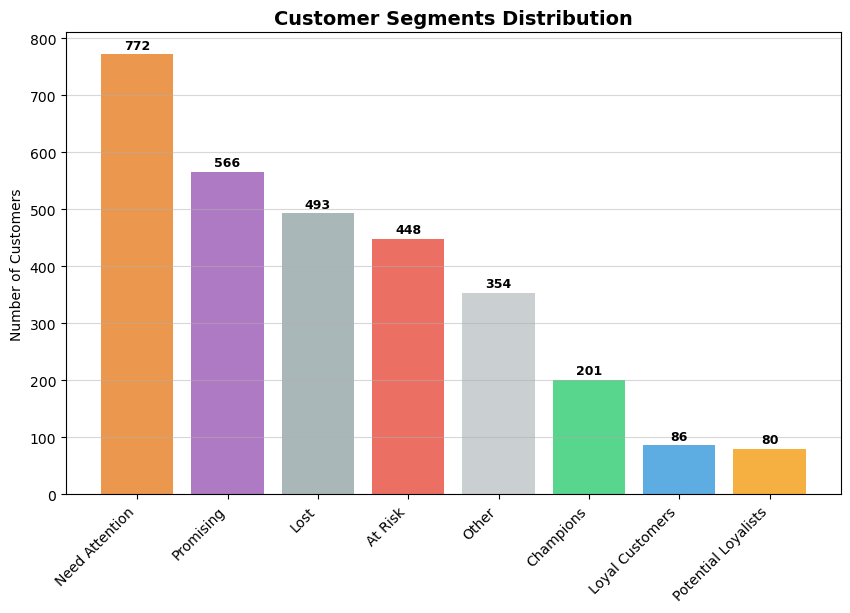

In [166]:
# Visualization
colors_segment = {
    'Champions': '#2ecc71',
    'Loyal Customers': '#3498db',
    'Potential Loyalists': '#f39c12',
    'Promising': '#9b59b6',
    'Need Attention': '#e67e22',
    'At Risk': '#e74c3c',
    'Lost': '#95a5a6',
    'Other': '#bdc3c7'
}
segment_colors = [colors_segment.get(seg, '#95a5a6') for seg in segment_counts.index]
plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(segment_counts)), segment_counts.values, color=segment_colors, alpha=0.8)
plt.xticks(range(len(segment_counts)), segment_counts.index, rotation=45, ha='right')
plt.grid(alpha=0.5, axis='y')
plt.title("Customer Segments Distribution", fontsize=14, fontweight="bold")
plt.ylabel("Number of Customers")

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 10, str(height), ha='center', fontweight='bold', fontsize=9)
plt.show()

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          3000 non-null   object        
 1   customer_id       3000 non-null   object        
 2   product_category  3000 non-null   object        
 3   order_value       3000 non-null   float64       
 4   discount_applied  3000 non-null   float64       
 5   payment_method    3000 non-null   object        
 6   order_status      3000 non-null   object        
 7   order_date        3000 non-null   datetime64[ns]
 8   region            3000 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 211.1+ KB


## RFM Segment Definitions & Business Actions

### CHAMPIONS (High R, F, M)
**Profile**: Your best customers - recent, frequent, high-spending
- **Action**: VIP treatment, exclusive offers, loyalty rewards, request referrals
- **Keep them happy!** - They drive 30-40% of revenue

###  LOYAL CUSTOMERS (High F, M, maybe older)
**Profile**: Consistent spenders, but haven't purchased recently
- **Action**: Win-back campaigns, "We miss you" discounts, exclusive member perks
- **Opportunity**: Re-engage before they become At Risk

###  POTENTIAL LOYALISTS (High R, M, new high-spenders)
**Profile**: Recent big spenders, not yet proven loyal
- **Action**: Nurture with personalized offers, build loyalty programs
- **Goal**: Convert to Champions

### PROMISING (Medium-High R/F/M)
**Profile**: Solid customers with growth potential
- **Action**: Engagement campaigns, upsell/cross-sell opportunities
- **Goal**: Move to higher tiers

###  NEED ATTENTION (High R, Low F/M)
**Profile**: Recent window-shoppers, small purchases
- **Action**: Educational content, product recommendations, onboarding
- **Goal**: Increase order frequency and value

###  AT RISK (Low R, High F/M)
**Profile**: Were valuable but going dormant - biggest lost revenue threat
- **Action**: Urgent win-back campaigns, exclusive comeback offers, phone outreach
- **ROI**: High - reactivating one At Risk customer >> acquiring new customer

###  LOST (Low R, F, M)
**Profile**: Inactive, low-engagement customers
- **Action**: Minimal spend on these; focus on reactivation if low CAC; otherwise let go
- **Decision**: Prune from email list to improve deliverability

## Product, Category and Seasonal Analaysis

The following business questions would be answered.

1. Best Selling Products: Which categories drive the most revenue and orders?
2. High-return/refund Categories: Which products have quality/satisfaction issues?
3. Sessonal Pattersn: When do customers buy most? lan inventory and marketting accoridingly

In [168]:
# Best-selling Products and categories

category_analysis = df.groupby("product_category").agg({
    "order_id": "count",
    "order_value": ["sum", "mean"],
    "customer_id": "nunique"
}).round(2)
category_analysis.columns = ["Order_count", "Total_Revenue", "Avg_Revenue_per_Order", "Unique_Customers"]
category_analysis["Revenue[%]"] = (category_analysis["Total_Revenue"] / category_analysis["Total_Revenue"].sum() * 100).round(1)
category_analysis["Order[%]"] = (category_analysis["Order_count"] / category_analysis["Order_count"].sum() * 100).round(1)

# Sorting by total revenue to see which categories drive the most revenue
category_analysis = category_analysis.sort_values(by="Total_Revenue", ascending=False)
print(category_analysis.to_string())

for idx, (cat, row) in enumerate(category_analysis.iterrows(), 1):
    print(f"\n{idx}. {cat.upper()}")
    print(f"   Orders: {int(row['Order_count'])} ({row['Order[%]']:.1f}% of total)")
    print(f"   Revenue: ${row['Total_Revenue']:,.2f} ({row['Revenue[%]']:.1f}% of total)")
    print(f"   Avg Order Value: ${row['Avg_Revenue_per_Order']:.2f}")
    print(f"   Unique Customers: {int(row['Unique_Customers'])}")
    
# Concentration analysis (80/20 Principle)
cumsum_revenue = category_analysis["Total_Revenue"].cumsum()
cumsum_revenue_pct = (cumsum_revenue / category_analysis["Total_Revenue"].sum()) * 100
print("How many categories contribute to 80% of the revenue?")
category_analysis["cumsum_revenue_pct"] = cumsum_revenue_pct.round(1)
num_categories_80 = (cumsum_revenue_pct <= 80).sum()
print(f"{num_categories_80} categories contribute to 80% of the revenue.")
print(f"These categories are: {', '.join(category_analysis.index[:num_categories_80])}")
num_categories_20 = len(category_analysis) - num_categories_80
print(f"{num_categories_20} categories are the remaining 20% of the revenue.")
print(f"These categories are: {', '.join(category_analysis.index[num_categories_80:])}")

                  Order_count  Total_Revenue  Avg_Revenue_per_Order  Unique_Customers  Revenue[%]  Order[%]
product_category                                                                                           
Fashion                   638      160212.95                 251.12               638        21.1      21.3
Beauty                    602      155558.95                 258.40               602        20.5      20.1
Electronics               592      152807.97                 258.12               592        20.1      19.7
Home                      614      151578.67                 246.87               614        20.0      20.5
Groceries                 554      138433.54                 249.88               554        18.2      18.5

1. FASHION
   Orders: 638 (21.3% of total)
   Revenue: $160,212.95 (21.1% of total)
   Avg Order Value: $251.12
   Unique Customers: 638

2. BEAUTY
   Orders: 602 (20.1% of total)
   Revenue: $155,558.95 (20.5% of total)
   Avg Order Value: $2

In [169]:
# High-return/refund anaysis by category

return_analysis = df.groupby("product_category").agg({
    "order_id": "count",
    "order_status": lambda x: ((x == "cancelled") | (x == "returned")).sum()
}).rename(columns={
    "order_id": "Total_Orders",
    "order_status": "Returns_Refunds"
})

return_analysis['Return_Rate[%]'] = (return_analysis['Returns_Refunds'] / return_analysis['Total_Orders'] * 100).round(1)
return_analysis['Completed_Orders'] = return_analysis['Total_Orders'] - return_analysis['Returns_Refunds']
return_analysis['Completion_Rate[%]'] = (return_analysis['Completed_Orders'] / return_analysis['Total_Orders'] * 100).round(1)

# sort by return rate to identify categories with the highest return/refund rates
return_analysis = return_analysis.sort_values(by="Return_Rate[%]", ascending=False)
return_analysis

for idx, (cat, row) in enumerate(return_analysis.iterrows(), 1):
    rate = row["Return_Rate[%]"]
    avg_rate = return_analysis["Return_Rate[%]"].mean()
    
    if rate > avg_rate + 5:
        status = " (High Return Rate) - Investigate"
    elif rate > avg_rate:
        status = " (Above Average Return Rate)"
    else:
        status = "Good"
    
    print(f"\n{idx}. {cat.upper()}: {rate:.1f}% return rate {status}")
    print(f"\n{idx}. {cat.upper()}: {rate:.1f}% return rate {status}")
    print(f"   Returns: {int(row['Returns_Refunds'])} out of {int(row['Total_Orders'])} orders")
    print(f"   Completion Rate: {row['Completion_Rate[%]']:.1f}%")
    if rate > avg_rate:
        lost_revenue = df[(df['product_category'] == cat) & 
                               ((df['order_status'] == 'cancelled') | 
                                (df['order_status'] == 'refunded'))]['order_value'].sum()
        print(f"   Lost Revenue: ${lost_revenue:,.2f}")

# Overall return/refund rate and impact on revenue

total_orders = len(df)
total_returns = ((df['order_status'] == 'cancelled') | (df['order_status'] == 'refunded')).sum()
overall_return_rate = (total_returns / total_orders * 100)
total_lost_revenue = df[((df['order_status'] == 'cancelled') | 
                               (df['order_status'] == 'refunded'))]['order_value'].sum()

print(f"Overall Return/Refund Rate: {overall_return_rate:.1f}%")
print(f"Total Orders at Risk: {total_returns} out of {total_orders}")
print(f"Total Lost Revenue: ${total_lost_revenue:,.2f}")
print(f"\nBenchmark: Industry average for e-commerce: 20-30%")
if overall_return_rate > 30:
    print(f"Rate ({overall_return_rate:.1f}%) is above industry average. Quality issue investigation should be carried out.")
elif overall_return_rate > 20:
    print(f"Rate ({overall_return_rate:.1f}%) is at high end. Close monitorying should be done")
else:
    print(f"Rate ({overall_return_rate:.1f}%) is good. Below industry average.")


1. BEAUTY: 34.9% return rate  (Above Average Return Rate)

1. BEAUTY: 34.9% return rate  (Above Average Return Rate)
   Returns: 210 out of 602 orders
   Completion Rate: 65.1%
   Lost Revenue: $104,306.02

2. HOME: 33.2% return rate  (Above Average Return Rate)

2. HOME: 33.2% return rate  (Above Average Return Rate)
   Returns: 204 out of 614 orders
   Completion Rate: 66.8%
   Lost Revenue: $95,462.59

3. ELECTRONICS: 32.9% return rate Good

3. ELECTRONICS: 32.9% return rate Good
   Returns: 195 out of 592 orders
   Completion Rate: 67.1%

4. GROCERIES: 32.9% return rate Good

4. GROCERIES: 32.9% return rate Good
   Returns: 182 out of 554 orders
   Completion Rate: 67.1%

5. FASHION: 32.0% return rate Good

5. FASHION: 32.0% return rate Good
   Returns: 204 out of 638 orders
   Completion Rate: 68.0%
Overall Return/Refund Rate: 65.8%
Total Orders at Risk: 1975 out of 3000
Total Lost Revenue: $498,318.20

Benchmark: Industry average for e-commerce: 20-30%
Rate (65.8%) is above indu

In [170]:
# Seasonal patterns and trends

df["order_month"] = df["order_date"].dt.month
df["order_month_name"] = df["order_date"].dt.strftime("%B")
df["Quarter"] = df["order_date"].dt.quarter
df["Week"] = df["order_date"].dt.isocalendar().week

# Defining seasons based on months
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Fall"

df["Season"] = df["order_month"].apply(get_season)

# Monthly revenue analysis

monthly_data = df.groupby("order_month_name").agg({
    "order_id": "count",
    "order_value": ["sum", "mean"],
    "customer_id": "nunique",
    "order_status": lambda x: (x == "completed").sum()
}).round(2)

# Reorder by month
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
monthly_data = monthly_data.reindex(month_order)

monthly_data.columns = ["Order_count", "Total_Revenue", "Avg_Revenue_per_Order", "Unique_Customers", "Completed_Orders"]

monthly_data["Completion_rate[%]"] = (monthly_data["Completed_Orders"] / monthly_data["Order_count"] * 100).round(1)
print(monthly_data.to_string())



                  Order_count  Total_Revenue  Avg_Revenue_per_Order  Unique_Customers  Completed_Orders  Completion_rate[%]
order_month_name                                                                                                           
January                   255       67990.67                 266.63               255                95                37.3
February                  236       59692.60                 252.93               236                92                39.0
March                     255       67124.56                 263.23               255                89                34.9
April                     272       66489.32                 244.45               272                86                31.6
May                       252       66202.79                 262.71               252                84                33.3
June                      208       51980.84                 249.91               208                72                34.6
July    

In [171]:
print("Quarterly Revenue Analysis:")

quarterly_data = df.groupby("Quarter").agg({
    "order_id": "count",
    "order_value": ["sum", "mean"],
    "customer_id": "nunique",
}).round(2)
quarterly_data.columns = ["Order_count", "Total_Revenue", "Avg_Revenue_per_Order", "Unique_Customers"]
quarterly_data['Revenue[%]'] = (quarterly_data['Total_Revenue'] / quarterly_data['Total_Revenue'].sum() * 100).round(1)
quarterly_data.index = ['Q' + str(i) for i in quarterly_data.index]

print(quarterly_data.to_string())


Quarterly Revenue Analysis:
    Order_count  Total_Revenue  Avg_Revenue_per_Order  Unique_Customers  Revenue[%]
Q1          746      194807.83                 261.14               746        25.7
Q2          732      184672.95                 252.29               732        24.3
Q3          730      178102.09                 243.98               730        23.5
Q4          792      201009.21                 253.80               792        26.5


In [172]:
print("Seasonal Revenue Analysis:")
seasonal_data = df.groupby("Season").agg({
    "order_id": "count",
    "order_value": ["sum", "mean"],
    "customer_id": "nunique",
    }).round(2)

seasonal_data.columns = ['Order_Count', 'Total_Revenue', 'Avg_Order_Value', 'Unique_Customers']
seasonal_data['Revenue_%'] = (seasonal_data['Total_Revenue'] / seasonal_data['Total_Revenue'].sum() * 100).round(1)
seasonal_data = seasonal_data.sort_values('Total_Revenue', ascending=False)

print(seasonal_data.to_string())

Seasonal Revenue Analysis:
        Order_Count  Total_Revenue  Avg_Order_Value  Unique_Customers  Revenue_%
Season                                                                          
Spring          779      199816.67           256.50               779       26.3
Winter          760      197553.52           259.94               760       26.0
Fall            759      187063.80           246.46               759       24.7
Summer          702      174158.09           248.09               702       23.0


In [173]:
# Key seasonal insgihts:
peak_month = monthly_data["Total_Revenue"].idxmax()
low_month = monthly_data["Total_Revenue"].idxmin()
peak_quarter = quarterly_data["Total_Revenue"].idxmax()
peak_season = seasonal_data["Total_Revenue"].idxmax()

In [174]:
print(f"Peak Periods:")
print(f"Peak Month: {peak_month} (${monthly_data.loc[peak_month, 'Total_Revenue']:,.2f})")
print(f"Peak Quarter: {peak_quarter} (${quarterly_data.loc[peak_quarter, 'Total_Revenue']:,.2f})")
print(f"Peak Season: {peak_season} (${seasonal_data.loc[peak_season, 'Total_Revenue']:,.2f})")

print(f"\nLow Periods:")
print(f"Low Month: {low_month} (${monthly_data.loc[low_month, 'Total_Revenue']:,.2f})")
print(f"Opportunity: Plan promotions during {low_month}")

# Calculating volatility
print(f"\nVolatility analysisis")
monthly_revenue = monthly_data['Total_Revenue']
revenue_std = monthly_revenue.std()
revenue_mean = monthly_revenue.mean()
revenue_cv = (revenue_std / revenue_mean) * 100
print(f"Average Monthly Revenue: ${revenue_mean:,.2f}")
print(f"Monthly Std Deviation: ${revenue_std:,.2f}")
print(f"Coefficient of Variation: {revenue_cv:.1f}%")
if revenue_cv > 30:
    print(f"HIGH seasonality: Plan inventory carefully")
else:
    print(f"MODERATE seasonality: Revenue relatively stable")

Peak Periods:
Peak Month: December ($69,870.25)
Peak Quarter: Q4 ($201,009.21)
Peak Season: Spring ($199,816.67)

Low Periods:
Low Month: June ($51,980.84)
Opportunity: Plan promotions during June

Volatility analysisis
Average Monthly Revenue: $63,216.01
Monthly Std Deviation: $5,497.23
Coefficient of Variation: 8.7%
MODERATE seasonality: Revenue relatively stable


In [175]:
df.head()

,order_id,customer_id,product_category,order_value,discount_applied,payment_method,order_status,order_date,region,order_month,order_month_name,Quarter,Week,Season
0,34d8ba8f-0afd-44cf-823f-b2354135703c,be0365c6-8790-4246-9302-634ffab9df26,Groceries,111.06,0.0,Bank Transfer,refunded,2024-03-12,Michigan,3,March,1,11,Spring
1,8627135c-c464-4c18-b732-2edf41eddd55,8f584420-5885-4335-95e0-6ab271f3161b,Fashion,385.79,5.0,Bank Transfer,completed,2024-09-01,Massachusetts,9,September,3,35,Fall
2,79924210-fff2-4914-9a89-a2a7d6f19916,34733dcd-976b-4d23-a524-ba62719e8b78,Electronics,55.24,5.0,Wallet,cancelled,2024-11-18,Massachusetts,11,November,4,47,Fall
3,82081915-4d79-4c93-8a10-16dca7aad660,b3de034f-1075-4f41-ad4a-effc4ef5df53,Electronics,352.88,15.0,Bank Transfer,refunded,2024-10-27,New Hampshire,10,October,4,43,Fall
4,f19bcde8-c96f-4e5e-a677-40795b86fbe3,04e94727-26fd-424d-9cbe-54dd84367952,Fashion,48.27,10.0,Wallet,completed,2024-10-28,Montana,10,October,4,44,Fall


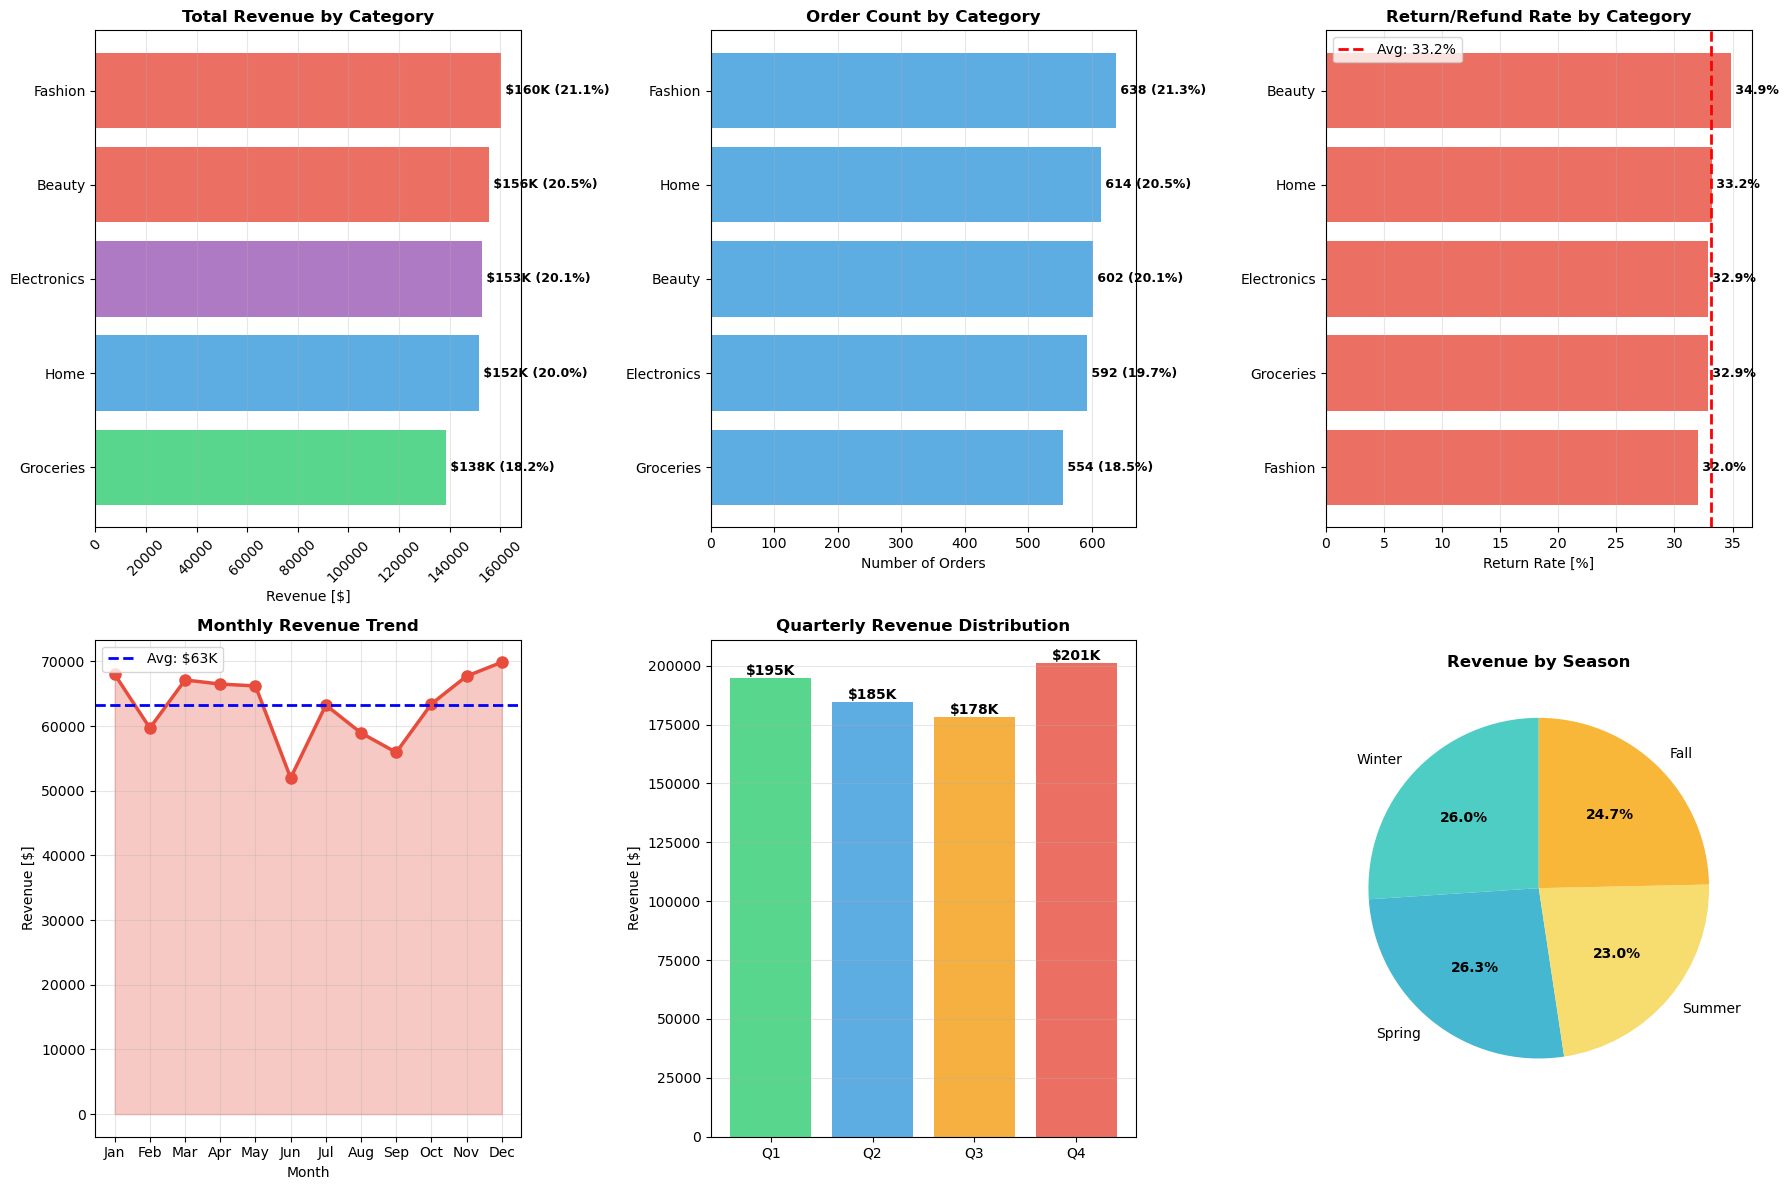


✅ Visualizations saved as 'product_category_seasonal_analysis.png'


In [176]:
# Visualization: Product, category and seasonal analysis

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Revenue by Category (Bar Chart)
category_revenue_sort = category_analysis.sort_values('Total_Revenue', ascending=True)
colors_cat = ['#2ecc71' if i == 0 else '#3498db' if i == 1 else '#e74c3c' if i >= len(category_revenue_sort)-2 else '#9b59b6' 
              for i in range(len(category_revenue_sort))]
axes[0, 0].barh(range(len(category_revenue_sort)), category_revenue_sort['Total_Revenue'], color=colors_cat, alpha=0.8)
axes[0, 0].set_yticks(range(len(category_revenue_sort)))
axes[0, 0].set_yticklabels(category_revenue_sort.index)
axes[0, 0].set_title('Total Revenue by Category', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Revenue [$]')
# rotate x-axis labels for better readability
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(alpha=0.3, axis='x')
for i, (idx, row) in enumerate(category_revenue_sort.iterrows()):
    axes[0, 0].text(row['Total_Revenue'], i, f" ${row['Total_Revenue']/1000:.0f}K ({row['Revenue[%]']:.1f}%)", 
                   va='center', fontweight='bold', fontsize=9)

# 2. Order Count by Category
category_orders_sort = category_analysis.sort_values('Order_count', ascending=True)
axes[0, 1].barh(range(len(category_orders_sort)), category_orders_sort['Order_count'], color='#3498db', alpha=0.8)
axes[0, 1].set_yticks(range(len(category_orders_sort)))
axes[0, 1].set_yticklabels(category_orders_sort.index)
axes[0, 1].set_title('Order Count by Category', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Number of Orders')
axes[0, 1].grid(alpha=0.3, axis='x')
for i, (idx, row) in enumerate(category_orders_sort.iterrows()):
    axes[0, 1].text(row['Order_count'], i, f" {int(row['Order_count'])} ({row['Order[%]']:.1f}%)", 
                   va='center', fontweight='bold', fontsize=9)

# 3. Return Rate by Category
return_rate_sort = return_analysis.sort_values('Return_Rate[%]', ascending=True)
colors_return = ['#2ecc71' if x < 20 else '#f39c12' if x < 30 else '#e74c3c' 
                 for x in return_rate_sort['Return_Rate[%]']]
axes[0, 2].barh(range(len(return_rate_sort)), return_rate_sort['Return_Rate[%]'], color=colors_return, alpha=0.8)
axes[0, 2].set_yticks(range(len(return_rate_sort)))
axes[0, 2].set_yticklabels(return_rate_sort.index)
axes[0, 2].set_title('Return/Refund Rate by Category', fontsize=12, fontweight='bold')
axes[0, 2].set_xlabel('Return Rate [%]')
axes[0, 2].axvline(x=return_analysis['Return_Rate[%]'].mean(), color='red', linestyle='--', 
                  linewidth=2, label=f"Avg: {return_analysis['Return_Rate[%]'].mean():.1f}%")
axes[0, 2].grid(alpha=0.3, axis='x')
axes[0, 2].legend()
for i, (idx, row) in enumerate(return_rate_sort.iterrows()):
    axes[0, 2].text(row['Return_Rate[%]'], i, f" {row['Return_Rate[%]']:.1f}%", 
                   va='center', fontweight='bold', fontsize=9)

# 4. Monthly Revenue Trend
month_nums = list(range(1, 13))
monthly_rev = df.groupby('order_month')['order_value'].sum().sort_index()
axes[1, 0].plot(monthly_rev.index, monthly_rev.values, marker='o', linewidth=2.5, markersize=8, color='#e74c3c')
axes[1, 0].fill_between(monthly_rev.index, monthly_rev.values, alpha=0.3, color='#e74c3c')
axes[1, 0].set_title('Monthly Revenue Trend', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Revenue [$]')
axes[1, 0].set_xticks(month_nums)
axes[1, 0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axes[1, 0].grid(alpha=0.3)
axes[1, 0].axhline(y=monthly_rev.mean(), color='blue', linestyle='--', linewidth=2, label=f"Avg: ${monthly_rev.mean()/1000:.0f}K")
axes[1, 0].legend()

# 5. Quarterly Breakdown
quarterly_rev = df.groupby('Quarter')['order_value'].sum()
quarterly_orders = df.groupby('Quarter')['order_id'].count()
bars = axes[1, 1].bar(quarterly_rev.index, quarterly_rev.values, color=['#2ecc71', '#3498db', '#f39c12', '#e74c3c'], alpha=0.8)
axes[1, 1].set_title('Quarterly Revenue Distribution', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Revenue [$]')
axes[1, 1].set_xticks([1, 2, 3, 4])
axes[1, 1].set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4'])
axes[1, 1].grid(alpha=0.3, axis='y')
for bar in bars:
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height,
                   f'${height/1000:.0f}K', ha='center', va='bottom', fontweight='bold', fontsize=10)

# 6. Seasonal Breakdown (Pie)
seasonal_rev = df.groupby('Season')['order_value'].sum()
season_order = ['Winter', 'Spring', 'Summer', 'Fall']
seasonal_rev = seasonal_rev.reindex([s for s in season_order if s in seasonal_rev.index])
colors_season = ['#4ecdc4', '#45b7d1', '#f7dc6f', '#f8b739']
wedges, texts, autotexts = axes[1, 2].pie(seasonal_rev.values, labels=seasonal_rev.index, 
                                            autopct='%1.1f%%', colors=colors_season, startangle=90)
axes[1, 2].set_title('Revenue by Season', fontsize=12, fontweight='bold')
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(10)

plt.tight_layout()
plt.savefig('product_category_seasonal_analysis.png', dpi=100, bbox_inches='tight')
plt.show()

print("\n✅ Visualizations saved as 'product_category_seasonal_analysis.png'")

## Strategic Recommendations

### BEST-SELLING PRODUCTS:

**Action Items:**
- **Stock Prioritization**: Allocate 60% of inventory to top 2-3 categories
- **Marketing Focus**: 80/20 rule - spend 80% of marketing budget on top performers
- **Bundle Opportunities**: Create bundles pairing top sellers with slow movers
- **Pricing Strategy**: Top performers can sustain price increases; experiment with +5-10%


### HIGH-RETURN/REFUND CATEGORIES:

**If Return Rate > 30%:**  CRISIS
- Quality issue likely - audit product sourcing/supplier
- Consider temporary delisting until resolved
- Offer proactive refunds before customers request

**If Return Rate 20-30%:** INVESTIGATE
- Customer expectation mismatch (size, color, description)
- Improve product photos/descriptions
- Add size guides, material information
- Implement better customer reviews visibility

**If Return Rate < 20%:** GOOD
- Continue current practices
- Use as benchmark for high-return categories


###  SEASONAL PATTERNS:

**Peak Seasons (Increase Inventory 20-30%):**
- Stock up 6-8 weeks before peak
- Increase paid advertising budget
- Plan promotional campaigns
- Hire seasonal customer service staff

**Low Seasons (Strategic Promotions):**
- Run flash sales to generate demand
- Clear old inventory during low periods
- Launch new products when demand is low (no revenue impact)
- Use time for system improvements/restocking

**Year-Round Planning:**
- **1 month before peak**: Finalize inventory, scale warehouse capacity
- **During peak**: Optimize fulfillment, monitor quality
- **After peak**: Analyze what worked, plan next year
- **Low season**: Clearance sales, deep discounts on slow movers